<a href="https://colab.research.google.com/github/fateme-alk/learning/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from statsmodels.stats.stattools import durbin_watson

In [39]:
data = {
    'house_size': [
        600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050,
        1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550,
        1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2100
    ],
    'price': [
        68, 72, 75, 78, 85, 87, 93, 97, 102, 106,
        110, 113, 118, 122, 125, 127, 130, 133, 138, 140,
        144, 147, 149, 152, 155, 158, 162, 165, 170, 175
    ]
}
df = pd.DataFrame(data)


In [40]:
df

,house_size,price
0,600,68
1,650,72
2,700,75
3,750,78
4,800,85
5,850,87
6,900,93
7,950,97
8,1000,102
9,1050,106


# Train Test Split

In [41]:
# we have to seprate precictors and targets as inputs to train_test_split function
predictor_train, predictor_test, target_train, target_test = train_test_split(df['house_size'], df['price'], test_size=0.2, shuffle=True, random_state=42)

In [42]:
predictor_train

,house_size
28,2000
24,1800
12,1200
0,600
4,800
16,1400
5,850
13,1250
11,1150
22,1700


In [43]:
predictor_test

,house_size
27,1950
15,1350
23,1750
17,1450
8,1000
9,1050


In [44]:
target_train

,price
28,170
24,155
12,118
0,68
4,85
16,130
5,87
13,122
11,113
22,149


In [45]:
target_test

,price
27,165
15,127
23,152
17,133
8,102
9,106


# Simple Linear Regression

<Axes: xlabel='house_size', ylabel='price'>

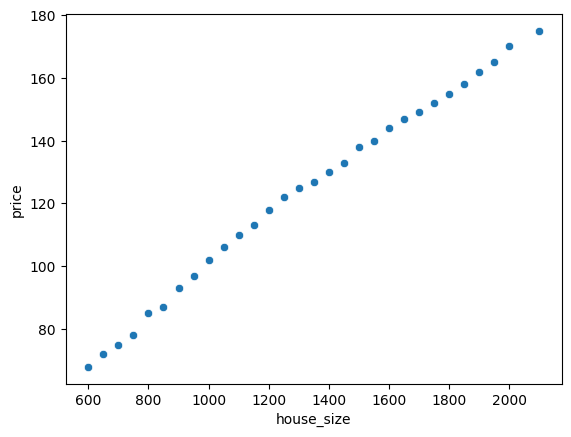

In [46]:
sns.scatterplot(df, x='house_size', y='price')

In [47]:
regressor = LinearRegression()

In [48]:
regressor

LinearRegression()

In [49]:
regressor.fit(predictor_train.to_frame(), target_train)

LinearRegression()

In [50]:
regressor.intercept_

np.float64(27.874870120231577)

In [51]:
regressor.coef_

array([0.0717441])

In [52]:
regressor.n_features_in_

1

In [53]:
regressor.n_jobs

In [54]:
price_predicted_LR = regressor.predict(predictor_test.to_frame())

In [55]:
price_predicted_LR

array([167.77586463, 124.72940478, 153.42704468, 131.90381475,
        99.61896987, 103.20617486])

In [56]:
type(price_predicted_LR)

numpy.ndarray

In [57]:
residuals_df = pd.DataFrame()

In [58]:
residuals_df['LR'] = target_test - price_predicted_LR

In [59]:
residuals_df

,LR
27,-2.775865
15,2.270595
23,-1.427045
17,1.096185
8,2.381030
9,2.793825


### Residula Mean

In [60]:
df['price_residual'].mean()

KeyError: 'price_residual'

### Residula Homoscedasticity

In [ ]:
sns.residplot(data=df, x='house_size', y='price_residual')

### Residula Distribution

In [ ]:
sns.kdeplot(df['price_residual'], fill=True, color='green')

In [ ]:
sns.distplot(df['price_residual'], hist=False, color='r')

In [ ]:
sns.distplot(df['price_residual'], hist=True, color='r')

### Residuals Dependency

In [ ]:
durbin_watson(df['price_residual'])

### Others

In [ ]:
sns.scatterplot(df, x='house_size', y='price', color="green", label='Actual Value')
plt.plot(df['house_size'], df['predicted_price'], color="red", linewidth=2, label="Linear Regression Fit")
plt.legend()

In [ ]:
# compare distribution of actual value and predicted value
sns.kdeplot(df['predicted_price'], fill=True, color='blue')
sns.kdeplot(df['price'], fill=True, color='green')

# Polynomial Regression

## Polynomial Regression - 1 order
  same as simple linear regression which implement above

In [ ]:
coefficients = np.polyfit(df['house_size'], df['price'], 1)

In [ ]:
coefficients

In [ ]:
equation = np.poly1d(coefficients)

In [ ]:
print(equation)

## Polynomial Regression - 2 order

In [ ]:
coefficients = np.polyfit(df['house_size'], df['price'], 2)

In [ ]:
coefficients

In [ ]:
equation = np.poly1d(coefficients)

In [ ]:
print(equation)

In [ ]:
df['price_predicted_PL2'] = equation(df['house_size'])

In [ ]:
df

In [ ]:
durbin_watson(df['price'] - df['price_predicted_PL2'])

In [ ]:
sns.residplot(data=df, x='house_size', y=df['price']-df['price_predicted_PL2'])

In [ ]:
res_price_predicted_PL2 = df['price'] - df['price_predicted_PL2']
res_price_predicted_PL2.mean()

In [ ]:
sns.kdeplot(df['price']-df['price_predicted_PL2'] , fill=True, color='green')

In [ ]:
plt.figure(figsize=(12, 8), facecolor='orange')
sns.scatterplot(df, x='house_size', y='price', color="green", label='Actual Value')
plt.plot(df['house_size'], df['price_predicted_PL2'], color="red", linewidth=2, label="Polynomial Fit (deg=2)")
plt.title('test')
plt.xlabel('111')
plt.legend(shadow=True, edgecolor='green', facecolor='pink')
plt.show()

## Polynomial Regression - 3 order




In [ ]:
coefficients = np.polyfit(df['house_size'], df['price'], 3)

In [ ]:
coefficients

In [ ]:
equation = np.poly1d(coefficients)

In [ ]:
print(equation)

In [ ]:
df['price_predicted_PL3'] = equation(df['house_size'])

In [ ]:
df

In [ ]:
durbin_watson(df['price'] - df['price_predicted_PL3'])

In [ ]:
sns.residplot(data=df, x='house_size', y=df['price']-df['price_predicted_PL3'])

In [ ]:
res_price_predicted_PL2 = df['price'] - df['price_predicted_PL3']
res_price_predicted_PL2.mean()

In [ ]:
sns.kdeplot(df['price']-df['price_predicted_PL3'] , fill=True, color='green')

#Others

In [ ]:
p1 = np.poly1d([1, 2])
p2 = np.poly1d([4, 9, 5, 4])

In [ ]:
type(p1)

In [ ]:
p1

In [ ]:
print(p1)

In [ ]:
p2

In [ ]:
print(p2)

In [ ]:
p1(0)

In [ ]:
print(p1(0))

In [ ]:
# Find the roots:
p1.r

In [ ]:
# Show the coefficients:
p1.c

In [ ]:
# Display the order (the leading zero-coefficients are removed):
p1.o

In [ ]:
# The name of the polynomial variable
p1.variable

In [ ]:
p2.variable

In [ ]:
df

In [ ]:
sns.regplot(x='house_size', y='price', data=df)